In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("..\Data\df_with_mod1 and emotion.csv")
df.drop(["Unnamed: 0", "resumen", "timing_concat"], axis = 1, inplace = True)
df = df[[c for c in df if c not in ['CLASE']] + ['CLASE']]
df.emotions = df.emotions.astype(object)
#df.set_index('timing_concat', inplace=True)

In [3]:
df.drop(["prob_mod1"], axis = 1, inplace = True)

In [4]:
dfe = pd.get_dummies(df["emotions"])

In [5]:
df.drop(["emotions"], axis = 1, inplace = True)
frames = [df, dfe]
df = pd.concat(frames, axis = 1)

In [6]:
df.head()

,tweet_count,length,n_mentions,elon_mentions,tesla_mentions,link,RT,CLASE,0,1,2,3,4,5
0,155,113.402685,304,12,41,90,155,0,0,0,0,0,0,1
1,207,122.841026,300,15,41,148,207,0,0,0,0,0,0,1
2,198,121.530928,267,14,39,130,198,1,0,0,0,0,0,1
3,197,117.746032,218,15,37,132,197,1,0,0,0,0,0,1
4,177,119.710059,257,21,28,109,177,1,0,0,0,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2961 entries, 0 to 2960
Data columns (total 14 columns):
tweet_count       2961 non-null int64
length            2961 non-null float64
n_mentions        2961 non-null int64
elon_mentions     2961 non-null int64
tesla_mentions    2961 non-null int64
link              2961 non-null int64
RT                2961 non-null int64
CLASE             2961 non-null int64
0                 2961 non-null uint8
1                 2961 non-null uint8
2                 2961 non-null uint8
3                 2961 non-null uint8
4                 2961 non-null uint8
5                 2961 non-null uint8
dtypes: float64(1), int64(7), uint8(6)
memory usage: 202.5 KB


In [8]:
df1 = pd.read_csv("..\Data\df_with_mod1_bis.csv")
print(df.columns)

Index([   'tweet_count',         'length',     'n_mentions',  'elon_mentions',
       'tesla_mentions',           'link',             'RT',          'CLASE',
                      0,                1,                2,                3,
                      4,                5],
      dtype='object')


In [9]:
df1.drop(['Unnamed: 0', 'timing_concat', 'tweet_count', 'length', 'n_mentions',
       'elon_mentions', 'tesla_mentions', 'link', 'RT', 'resumen', 'CLASE', 'label_predict'], axis = 1, inplace = True)
df1.head()

,open,low,high,volume
0,229.238,226.557,229.667,0.0997
1,226.898,225.227,227.328,0.1783
2,226.927,226.207,227.888,0.1280
3,227.538,227.267,228.928,0.0927
4,227.597,226.867,231.408,0.1421


In [10]:
columnas= []

for i in range(len(df1.columns)):
    columnas.append(df1.columns[i])

for i in range(len(df.columns)):
    columnas.append(df.columns[i])
print(columnas)

['open', 'low', 'high', 'volume', 'tweet_count', 'length', 'n_mentions', 'elon_mentions', 'tesla_mentions', 'link', 'RT', 'CLASE', 0, 1, 2, 3, 4, 5]


In [11]:
df = pd.concat( [df1, df], axis=1, ignore_index = True) 
df.columns = columnas
df.head()

,open,low,high,volume,tweet_count,length,n_mentions,elon_mentions,tesla_mentions,link,RT,CLASE,0,1,2,3,4,5
0,229.238,226.557,229.667,0.0997,155,113.402685,304,12,41,90,155,0,0,0,0,0,0,1
1,226.898,225.227,227.328,0.1783,207,122.841026,300,15,41,148,207,0,0,0,0,0,0,1
2,226.927,226.207,227.888,0.1280,198,121.530928,267,14,39,130,198,1,0,0,0,0,0,1
3,227.538,227.267,228.928,0.0927,197,117.746032,218,15,37,132,197,1,0,0,0,0,0,1
4,227.597,226.867,231.408,0.1421,177,119.710059,257,21,28,109,177,1,0,0,0,0,0,1


In [12]:
df = df[[c for c in df if c not in ['CLASE']] + ['CLASE']]
df.head()

,open,low,high,volume,tweet_count,length,n_mentions,elon_mentions,tesla_mentions,link,RT,0,1,2,3,4,5,CLASE
0,229.238,226.557,229.667,0.0997,155,113.402685,304,12,41,90,155,0,0,0,0,0,1,0
1,226.898,225.227,227.328,0.1783,207,122.841026,300,15,41,148,207,0,0,0,0,0,1,0
2,226.927,226.207,227.888,0.1280,198,121.530928,267,14,39,130,198,0,0,0,0,0,1,1
3,227.538,227.267,228.928,0.0927,197,117.746032,218,15,37,132,197,0,0,0,0,0,1,1
4,227.597,226.867,231.408,0.1421,177,119.710059,257,21,28,109,177,0,0,0,0,0,1,1


In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [14]:
features = df.columns.difference(['CLASE']).tolist()
print(features)
scaled = std.fit_transform(df[features])

[0, 1, 2, 3, 4, 5, 'RT', 'elon_mentions', 'high', 'length', 'link', 'low', 'n_mentions', 'open', 'tesla_mentions', 'tweet_count', 'volume']


In [15]:
scaled.shape

(2961, 17)

In [16]:
df1 = pd.DataFrame(data = scaled,
                   columns = features)
df1.head()

,0,1,2,3,4,5,RT,elon_mentions,high,length,link,low,n_mentions,open,tesla_mentions,tweet_count,volume
0,-0.404299,-0.235828,-0.1401,-0.124226,-0.115529,0.563179,-0.502666,-0.778493,-0.594321,-0.082998,-0.461700,-0.629211,-0.198503,-0.591658,-0.337868,-0.502666,-1.056018
1,-0.404299,-0.235828,-0.1401,-0.124226,-0.115529,0.563179,-0.361431,-0.677337,-0.635504,1.848156,0.009630,-0.652687,-0.214925,-0.632892,-0.337868,-0.361431,-0.971722
2,-0.404299,-0.235828,-0.1401,-0.124226,-0.115529,0.563179,-0.385876,-0.711056,-0.625644,1.580100,-0.136645,-0.635389,-0.350400,-0.632381,-0.376520,-0.385876,-1.025667
3,-0.404299,-0.235828,-0.1401,-0.124226,-0.115529,0.563179,-0.388592,-0.677337,-0.607333,0.805683,-0.120392,-0.616679,-0.551562,-0.621614,-0.415173,-0.388592,-1.063525
4,-0.404299,-0.235828,-0.1401,-0.124226,-0.115529,0.563179,-0.442913,-0.475024,-0.563668,1.207537,-0.307299,-0.623740,-0.391454,-0.620575,-0.589110,-0.442913,-1.010545


In [17]:
df = pd.concat( [df1, df["CLASE"]], 
                axis=1,
                ignore_index = True) 
columnas = features
columnas.append("CLASE")


In [18]:
df.columns = columnas
features.remove("CLASE")
df.head()

,0,1,2,3,4,5,RT,elon_mentions,high,length,link,low,n_mentions,open,tesla_mentions,tweet_count,volume,CLASE
0,-0.404299,-0.235828,-0.1401,-0.124226,-0.115529,0.563179,-0.502666,-0.778493,-0.594321,-0.082998,-0.461700,-0.629211,-0.198503,-0.591658,-0.337868,-0.502666,-1.056018,0
1,-0.404299,-0.235828,-0.1401,-0.124226,-0.115529,0.563179,-0.361431,-0.677337,-0.635504,1.848156,0.009630,-0.652687,-0.214925,-0.632892,-0.337868,-0.361431,-0.971722,0
2,-0.404299,-0.235828,-0.1401,-0.124226,-0.115529,0.563179,-0.385876,-0.711056,-0.625644,1.580100,-0.136645,-0.635389,-0.350400,-0.632381,-0.376520,-0.385876,-1.025667,1
3,-0.404299,-0.235828,-0.1401,-0.124226,-0.115529,0.563179,-0.388592,-0.677337,-0.607333,0.805683,-0.120392,-0.616679,-0.551562,-0.621614,-0.415173,-0.388592,-1.063525,1
4,-0.404299,-0.235828,-0.1401,-0.124226,-0.115529,0.563179,-0.442913,-0.475024,-0.563668,1.207537,-0.307299,-0.623740,-0.391454,-0.620575,-0.589110,-0.442913,-1.010545,1


In [19]:
print(features)

[0, 1, 2, 3, 4, 5, 'RT', 'elon_mentions', 'high', 'length', 'link', 'low', 'n_mentions', 'open', 'tesla_mentions', 'tweet_count', 'volume']


In [21]:
df.to_csv("..\Data\df_para_entrenamiento.csv")

### Split entre train y test

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
features = df.columns.difference(['CLASE']).tolist()

X = df[features].values
Y = df.CLASE

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# MODELADO

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Flatten, Dropout

from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot

from sklearn.metrics import roc_curve, auc

Using TensorFlow backend.


### Regresión logística

In [24]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(f'Accuracy of logistic regression classifier on test set: {100*logreg.score(X_test, y_test)} %')

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

Accuracy of logistic regression classifier on test set: 56.708860759493675 %
[[232 338]
 [175 440]]


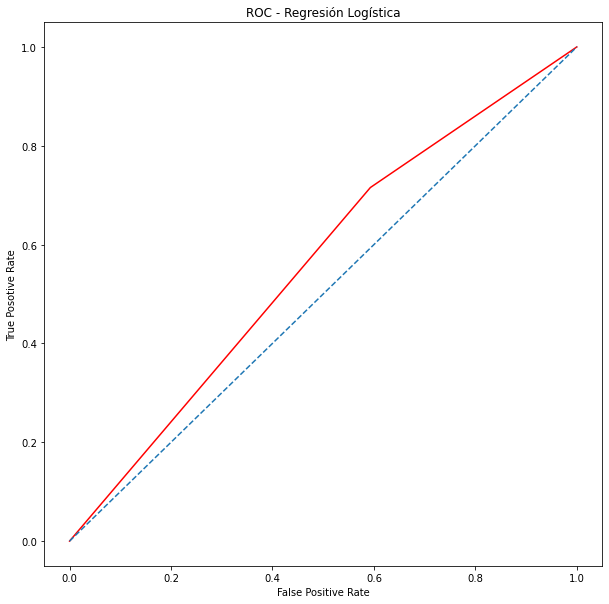

In [25]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

def plot_roc(roc_auc):
    plt.figure(figsize = (10, 10))
    plt.title("ROC - Regresión Logística")
    plt.plot(false_positive_rate, true_positive_rate, color = "red", label = "AUC = %0.2f" %roc_auc)
    plt.plot([0,1], [0,1], linestyle = "--")
    plt.axis("tight")
    plt.ylabel("True Posotive Rate")
    plt.xlabel("False Positive Rate")
plot_roc(roc_auc)

In [26]:
print(features)

[0, 1, 2, 3, 4, 5, 'RT', 'elon_mentions', 'high', 'length', 'link', 'low', 'n_mentions', 'open', 'tesla_mentions', 'tweet_count', 'volume']


Feature: 0, Score: -0.01607
Feature: 1, Score: 0.01790
Feature: 2, Score: -0.02024
Feature: 3, Score: -0.04633
Feature: 4, Score: 0.05405
Feature: 5, Score: 0.00905
Feature: 6, Score: -0.07620
Feature: 7, Score: -0.07585
Feature: 8, Score: 1.91251
Feature: 9, Score: -0.06308
Feature: 10, Score: 0.34213
Feature: 11, Score: 1.38747
Feature: 12, Score: -0.11597
Feature: 13, Score: -3.30263
Feature: 14, Score: -0.07586
Feature: 15, Score: -0.07620
Feature: 16, Score: -0.12993


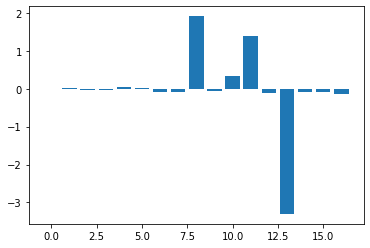

In [27]:
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### LDA

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [29]:
LDA = LinearDiscriminantAnalysis()

LDA.fit(X_train, y_train)

y_pred = LDA.predict(X_test)
print(f'Accuracy of logistic regression classifier on test set: {100*LDA.score(X_test, y_test)} %')

cm = confusion_matrix(y_test,y_pred)
print(cm)

Accuracy of logistic regression classifier on test set: 84.05063291139241 %
[[460 110]
 [ 79 536]]


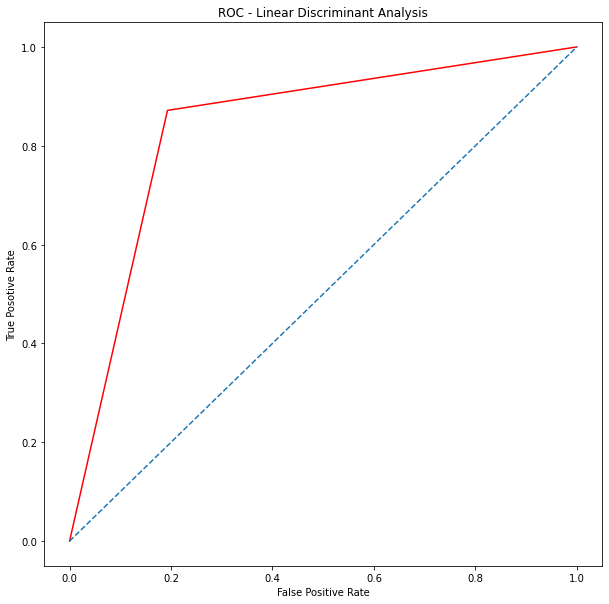

In [30]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

def plot_roc(roc_auc):
    plt.figure(figsize = (10, 10))
    plt.title("ROC - Linear Discriminant Analysis")
    plt.plot(false_positive_rate, true_positive_rate, color = "red", label = "AUC = %0.2f" %roc_auc)
    plt.plot([0,1], [0,1], linestyle = "--")
    plt.axis("tight")
    plt.ylabel("True Posotive Rate")
    plt.xlabel("False Positive Rate")
plot_roc(roc_auc)

Feature: 0, Score: -0.02742
Feature: 1, Score: -0.00245
Feature: 2, Score: -0.02681
Feature: 3, Score: -0.10121
Feature: 4, Score: 0.10391
Feature: 5, Score: 0.03248
Feature: 6, Score: 0.12877
Feature: 7, Score: -0.00814
Feature: 8, Score: 90.03094
Feature: 9, Score: 0.05117
Feature: 10, Score: -0.06659
Feature: 11, Score: 121.46776
Feature: 12, Score: -0.01791
Feature: 13, Score: -211.54742
Feature: 14, Score: -0.14410
Feature: 15, Score: 0.12877
Feature: 16, Score: -0.15365


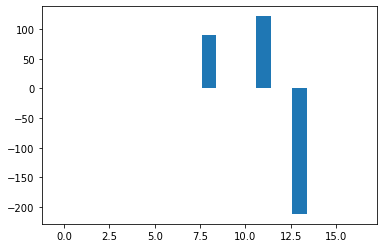

In [31]:
importance = LDA.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### KNN

In [32]:
knn_clf = KNeighborsClassifier(n_neighbors = 50, n_jobs=-1)

knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)
print(f'Accuracy of KNN classifier on test set: {100*knn_clf.score(X_test, y_test)} %')

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

Accuracy of KNN classifier on test set: 51.561181434599156 %
[[308 262]
 [312 303]]


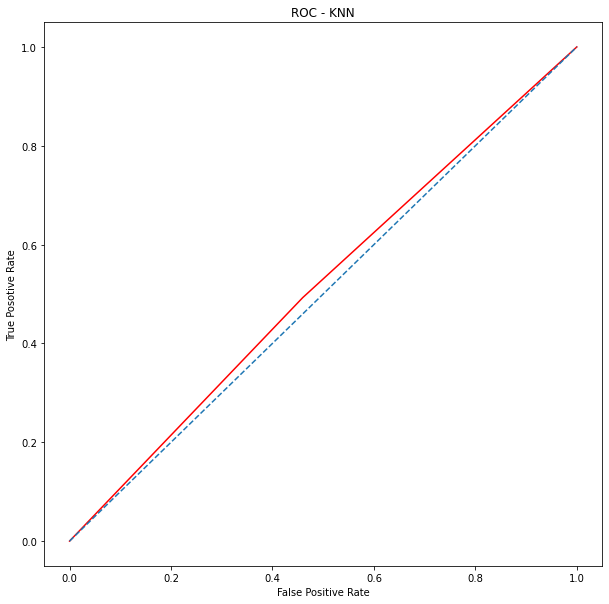

In [33]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

def plot_roc(roc_auc):
    plt.figure(figsize = (10, 10))
    plt.title("ROC - KNN")
    plt.plot(false_positive_rate, true_positive_rate, color = "red", label = "AUC = %0.2f" %roc_auc)
    plt.plot([0,1], [0,1], linestyle = "--")
    plt.axis("tight")
    plt.ylabel("True Posotive Rate")
    plt.xlabel("False Positive Rate")
plot_roc(roc_auc)

### SVC

In [34]:
svc = SVC(kernel = "linear", C = 1, degree = 1, gamma = "auto")

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
print(f'Accuracy of KNN classifier on test set: {100*svc.score(X_test, y_test)} %')

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

Accuracy of KNN classifier on test set: 53.58649789029536 %
[[110 460]
 [ 90 525]]


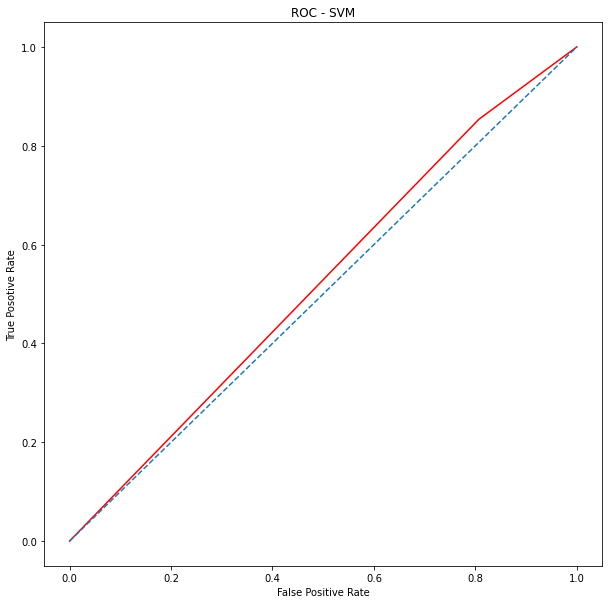

In [35]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

def plot_roc(roc_auc):
    plt.figure(figsize = (10, 10))
    plt.title("ROC - SVM")
    plt.plot(false_positive_rate, true_positive_rate, color = "red", label = "AUC = %0.2f" %roc_auc)
    plt.plot([0,1], [0,1], linestyle = "--")
    plt.axis("tight")
    plt.ylabel("True Posotive Rate")
    plt.xlabel("False Positive Rate")
plot_roc(roc_auc)

### NN1

In [36]:
input_dim = len(features)
print(input_dim)

17


In [37]:
# Baseline model for the neural network. We choose a hidden layer of 10 neurons. The lesser number of neurons helps to eliminate the redundancies in the data and select the more important features.
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=10, batch_size=10, verbose=1)))
pipeline = Pipeline(estimators)

kfold = StratifiedKFold(n_splits=4, shuffle=True)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold, verbose = 1, n_jobs = -1)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Results: 50.56% (2.96%)


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.2s finished


In [38]:
modelo = pipeline.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(f'Accuracy of nn classifier on test set: {100*modelo.score(X_test, y_test)} %')

cm = confusion_matrix(y_test,y_pred)
print(cm)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
1776/1776 [==============================] - 0s 127us/step - loss: 0.6932 - accuracy: 0.5186
Epoch 2/10
1776/1776 [==============================] - 0s 79us/step - loss: 0.6927 - accuracy: 0.5276
Epoch 3/10
1776/1776 [==============================] - 0s 73us/step - loss: 0.6918 - accuracy: 0.5293
Epoch 4/10
1776/1776 [==============================] - 0s 77us/step - loss: 0.6907 - accuracy: 0.5428
Epoch 5/10
1776/1776 [==============================] - 0s 78us/step - loss: 0.6893 - accuracy: 0.5400
Epoch 6/10
1776/1776 [==============================] - 0s 74us/step - loss: 0.6887 - accuracy: 0.5343
Epoch 7/10
1776/1776 [==============================] - 0s 74us/step - loss: 0.6881 - accuracy: 0.5293
Epoch 8/10
1776/1776 [==============================] - 0s 75us/step - loss: 0.6871 - accuracy: 0.5428

### NN2

In [39]:
X_train.shape

(1776, 17)

In [40]:
len(df[features].columns)

17

In [41]:
X_train1 = X_train.reshape(len(X_train), 1, len(df[features].columns))
X_test1 = X_test.reshape(len(X_test), 1, len(df[features].columns))

In [42]:
y_train1 = y_train.to_numpy()
y_test1 = y_test.to_numpy()

In [43]:
y_train1

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [44]:
# create model
model = Sequential()
model.add(LSTM(64, activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(10,  activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train1, y_train1, batch_size = 10, epochs = 5, validation_split = 0.2)

y_pred = model.predict(X_test1)

Train on 1420 samples, validate on 356 samples
Epoch 1/5
1420/1420 [==============================] - 1s 472us/step - loss: 0.6938 - accuracy: 0.4915 - val_loss: 0.6939 - val_accuracy: 0.4494
Epoch 2/5
1420/1420 [==============================] - 0s 231us/step - loss: 0.6934 - accuracy: 0.4831 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
1420/1420 [==============================] - 0s 212us/step - loss: 0.6934 - accuracy: 0.5028 - val_loss: 0.6940 - val_accuracy: 0.4551
Epoch 4/5
1420/1420 [==============================] - 0s 192us/step - loss: 0.6930 - accuracy: 0.5204 - val_loss: 0.6939 - val_accuracy: 0.4494
Epoch 5/5
1420/1420 [==============================] - 0s 240us/step - loss: 0.6934 - accuracy: 0.4937 - val_loss: 0.6941 - val_accuracy: 0.4607


In [45]:
loss, accuracy = model.evaluate(X_test1, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 48.523206


### Random Forest

In [46]:
rf_clf = RandomForestClassifier(n_estimators = 100,max_depth= 40, n_jobs=-1, random_state = 42)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print(f'Accuracy of KNN classifier on test set: {100*rf_clf.score(X_test, y_test)} %')

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

Accuracy of KNN classifier on test set: 52.320675105485236 %
[[287 283]
 [282 333]]


Feature ranking:
1. feature 9 (0.100275)
2. feature 16 (0.099899)
3. feature 13 (0.093942)
4. feature 12 (0.091890)
5. feature 10 (0.091060)
6. feature 15 (0.084251)
7. feature 11 (0.083017)
8. feature 14 (0.081532)
9. feature 8 (0.081311)
10. feature 6 (0.081196)
11. feature 7 (0.077113)
12. feature 5 (0.010948)
13. feature 0 (0.009107)
14. feature 1 (0.004804)
15. feature 2 (0.004788)
16. feature 3 (0.002496)
17. feature 4 (0.002371)


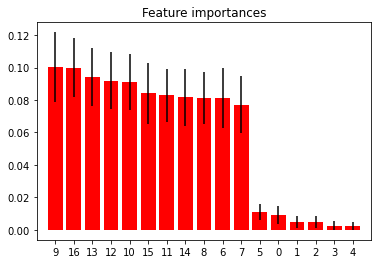

In [47]:
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [48]:
features

[0,
 1,
 2,
 3,
 4,
 5,
 'RT',
 'elon_mentions',
 'high',
 'length',
 'link',
 'low',
 'n_mentions',
 'open',
 'tesla_mentions',
 'tweet_count',
 'volume']

### XGBoosting con Hyperopt

In [49]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [50]:
#Defino el espacio de Hiperparámetros
space = {
            'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1.0, 0.05),
            'gamma' : hp.quniform('gamma', 0.01, 0.5, 0.05),
            'learning_rate' : hp.quniform('learning_rate', 0.01, 0.2, 0.01),
            'max_depth' : hp.choice('max_depth', range(1, 20, 2)),
            'min_child_weight' : hp.quniform('min_child_weight', 1, 100, 5),
            'n_estimators' : hp.choice('n_estimators', range(300, 400, 10)),
            'reg_alpha': hp.choice('reg_alpha',[1e-5, 1e-2, 0.1]),
            'subsample' : hp.quniform('subsample', 0.4, 0.8, 0.05),
            
}

In [51]:
def objective(space):

    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    classifier = xgb.XGBClassifier(n_estimators = space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            gamma = space['gamma'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree = space['colsample_bytree']
                            )
    
    classifier.fit(X_train, y_train)

    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)
    CrossValMean = accuracies.mean()

    print("CrossValMean:", CrossValMean)

    return{'loss':1-CrossValMean, 'status': STATUS_OK }


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)
print("Best: ", best)

CrossValMean:                                                                                                          
0.5067567567567568                                                                                                     
CrossValMean:                                                                                                          
0.5016891891891891                                                                                                     
CrossValMean:                                                                                                          
0.5202702702702703                                                                                                     
CrossValMean:                                                                                                          
0.5056306306306305                                                                                                     
CrossValMean:                           

CrossValMean:                                                                                                          
0.5016891891891891                                                                                                     
CrossValMean:                                                                                                          
0.5045045045045046                                                                                                     
CrossValMean:                                                                                                          
0.5022522522522522                                                                                                     
CrossValMean:                                                                                                          
0.4983108108108108                                                                                                     
CrossValMean:                           

In [52]:
# Fitting XGBoost to the Training set

classifier = XGBClassifier(n_estimators = best['n_estimators'],
                            max_depth = best['max_depth'],
                            learning_rate = best['learning_rate'],
                            gamma = best['gamma'],
                            min_child_weight = best['min_child_weight'],
                            subsample = best['subsample'],
                            colsample_bytree = best['colsample_bytree']
                            )

classifier.fit(X_train, y_train)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
CrossValMean = accuracies.mean()
print("Final CrossValMean: ", CrossValMean)


Final CrossValMean:  0.48424109693391737


In [53]:
CrossValSTD = accuracies.std()

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [54]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[249 321]
 [259 356]]


In [55]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {100*accuracy_score(y_test, y_pred)} %')

Accuracy: 51.0548523206751 %


### Stacking 1

https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

In [56]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('LR', LogisticRegression()))
#    level0.append(('KNN', KNeighborsClassifier(n_neighbors = 50)))
#    level0.append(('Tree', DecisionTreeClassifier()))
#    level0.append(('svm', SVC()))
#    level0.append(('bayes', GaussianNB()))
    level0.append(('LDA', LinearDiscriminantAnalysis()))
#    level0.append(('QDA', QuadraticDiscriminantAnalysis()))
    # define meta learner model
    level1 = LinearDiscriminantAnalysis()
    
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['LR'] = LogisticRegression()
#    models['KNN'] = KNeighborsClassifier()
#    models['Tree'] = DecisionTreeClassifier()
#    models['SVM'] = SVC()
#    models['Bayes'] = GaussianNB()
#    models['QDA'] = QuadraticDiscriminantAnalysis()
    models['LDA'] = LinearDiscriminantAnalysis()
    models['stacking'] = get_stacking()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    
    return scores

In [57]:
models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('> %s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
    model.fit(X_train, y_train)
    model.predict(X_test)
    print(f'Accuracy of {name} classifier on test set: {100*model.score(X_test, y_test)} %')
    print()

TypeError: 'numpy.ndarray' object is not callable